#### 1.0 Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#### 2.0 Loading dataset

In [6]:
df = pd.read_csv("../../data/interim/processed_data_for_ml_presentation.csv")
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3.0,1.00,5650.0,1.0,0.0,0.0,3.0,7.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0
1,538000.0,3.0,2.25,7242.0,2.0,0.0,0.0,3.0,7.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0
2,180000.0,2.0,1.00,10000.0,1.0,0.0,0.0,3.0,6.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0
3,604000.0,4.0,3.00,5000.0,1.0,0.0,0.0,5.0,7.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0
4,510000.0,3.0,2.00,8080.0,1.0,0.0,0.0,3.0,8.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0


#### 3.0 Model Building  

In [7]:
X = df.drop(["price"], axis="columns")
y = df["price"]

##### 3.1 Just testing using linear regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (
    train_test_split,
    KFold,
    cross_val_score,
    GridSearchCV,
)
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_test = linear_regression.predict(X_test)
y_pred_training = linear_regression.predict(X_train)
print(f"Training Score: {linear_regression.score(X_train, y_train)}")
print(f"Training mean squared error: {mean_squared_error(y_train, y_pred_training)}")
print(f"Training R-Squared error: {r2_score(y_train, y_pred_training)}")
print("*" * 10)
print(f"Test Score: {linear_regression.score(X_test,y_test)}")
print(f"Testing mean squared error: {mean_squared_error(y_test, y_pred_test)}")
print(f"Testing R-Squared error: {r2_score(y_test, y_pred_test)}")

Training Score: 0.6989847013624686
Training mean squared error: 20531016177.508263
Training R-Squared error: 0.6989847013624686
**********
Test Score: 0.6907805767421724
Testing mean squared error: 20097914800.87463
Testing R-Squared error: 0.6907805767421724


##### 3.2 Creating Pipeline for all models

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import (
    Ridge,
    Lasso,
    BayesianRidge,
    ElasticNet,
    SGDRegressor,
    HuberRegressor,
    RANSACRegressor,
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

sc = ("Scaler", StandardScaler())
est = []
est.append(
    ("LinearRegression", Pipeline([sc, ("LinearRegression", LinearRegression())]))
)
est.append(("Ridge", Pipeline([sc, ("Ridge", Ridge())])))
est.append(("Lasso", Pipeline([sc, ("Lasso", Lasso())])))
est.append(("BayesianRidge", Pipeline([sc, ("BayesianRidge", BayesianRidge())])))
est.append(("ElasticNet", Pipeline([sc, ("Elastic", ElasticNet())])))
est.append(("SGD", Pipeline([sc, ("SGD", SGDRegressor())])))
est.append(("Huber", Pipeline([sc, ("Huber", HuberRegressor())])))
est.append(("RANSAC", Pipeline([sc, ("RANSAC", RANSACRegressor())])))
est.append(
    (
        "GradientBoosting",
        Pipeline([sc, ("GradientBoosting", GradientBoostingRegressor())]),
    )
)
est.append(("AdaBoost", Pipeline([sc, ("AdaBoost", AdaBoostRegressor())])))
est.append(("ExtraTree", Pipeline([sc, ("ExtraTrees", ExtraTreesRegressor())])))
est.append(("RandomForest", Pipeline([sc, ("RandomForest", RandomForestRegressor())])))
est.append(("Bagging", Pipeline([sc, ("Bagging", BaggingRegressor())])))
est.append(("KNeighbors", Pipeline([sc, ("KNeighbors", KNeighborsRegressor())])))
est.append(("DecisionTree", Pipeline([sc, ("DecisionTree", DecisionTreeRegressor())])))
est.append(("XGB", Pipeline([sc, ("XGB", XGBRegressor())])))

##### 3.3 K-fold cross validation

In [10]:
import warnings

warnings.filterwarnings(action="ignore")
seed = 4
splits = 7
score = "r2"
models_score = []
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], X_train, y_train, cv=kfold, scoring=score)
    models_score.append({i[0]: "{}".format(results.mean())})

In [11]:
models_score

[{'LinearRegression': '0.6980108724214993'},
 {'Ridge': '0.6980109911794514'},
 {'Lasso': '0.6980109650952863'},
 {'BayesianRidge': '0.6980115902679559'},
 {'ElasticNet': '0.6523553026464493'},
 {'SGD': '0.6968354424458957'},
 {'Huber': '0.6896909329710036'},
 {'RANSAC': '-0.11063965198573296'},
 {'GradientBoosting': '0.8388323976327063'},
 {'AdaBoost': '0.5580768061292172'},
 {'ExtraTree': '0.8545978527699292'},
 {'RandomForest': '0.8563854624299972'},
 {'Bagging': '0.8391475185479352'},
 {'KNeighbors': '0.774055786450047'},
 {'DecisionTree': '0.7048824952645526'},
 {'XGB': '0.8635389852540631'}]

##### 3.4 Sorting model score in reverse order

In [12]:
for model_dict in models_score:
    for model, score in model_dict.items():
        model_dict[model] = float(score)
sorted_models_score = sorted(
    models_score, key=lambda x: list(x.values())[0], reverse=True
)

for item in sorted_models_score:
    print(item)

{'XGB': 0.8635389852540631}
{'RandomForest': 0.8563854624299972}
{'ExtraTree': 0.8545978527699292}
{'Bagging': 0.8391475185479352}
{'GradientBoosting': 0.8388323976327063}
{'KNeighbors': 0.774055786450047}
{'DecisionTree': 0.7048824952645526}
{'BayesianRidge': 0.6980115902679559}
{'Ridge': 0.6980109911794514}
{'Lasso': 0.6980109650952863}
{'LinearRegression': 0.6980108724214993}
{'SGD': 0.6968354424458957}
{'Huber': 0.6896909329710036}
{'ElasticNet': 0.6523553026464493}
{'AdaBoost': 0.5580768061292172}
{'RANSAC': -0.11063965198573296}


##### 3.5 Hyperparameter tuning XGB Regressor

In [13]:
est = []
est.append(("XGB", Pipeline([sc, ("XGB", XGBRegressor())])))

best = []

parameters = {
    "XGB": {
        "XGB__learning_rate": [0.01, 0.1, 0.2],
        "XGB__max_depth": [3, 5, 7],
        "XGB__n_estimators": [100, 200, 500],
        "XGB__subsample": [0.8, 1.0],
        "XGB__colsample_bytree": [0.8, 1.0],
    }
}

for i in est:
    kfold = KFold(n_splits=5, random_state=4, shuffle=True)
    grid = GridSearchCV(
        estimator=i[1], param_grid=parameters[i[0]], cv=kfold, n_jobs=-1
    )
    grid.fit(X_train, y_train)
    best.append((i[0], grid.best_score_, grid.best_params_))

print(best)

[('XGB', 0.8764336347222583, {'XGB__colsample_bytree': 0.8, 'XGB__learning_rate': 0.1, 'XGB__max_depth': 5, 'XGB__n_estimators': 500, 'XGB__subsample': 0.8})]


##### 3.6 Training and Testing XGB Regressor with best parameters 

In [14]:
xgb = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=500, colsample_bytree = 0.8, subsample = 0.8)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(f"Score of XGB Regressor: {xgb.score(X_test, y_test) * 100}")
r2 = r2_score(y_test, pred)
print(f"R-squared Score: {r2}")

Score of XGB Regressor: 87.40757230198159
R-squared Score: 0.874075723019816


##### 3.7 Watching Most important features

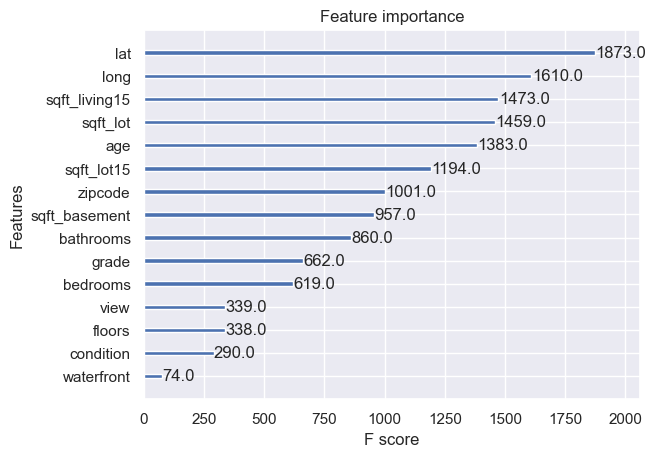

In [15]:
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

##### 3.8 QQ plot

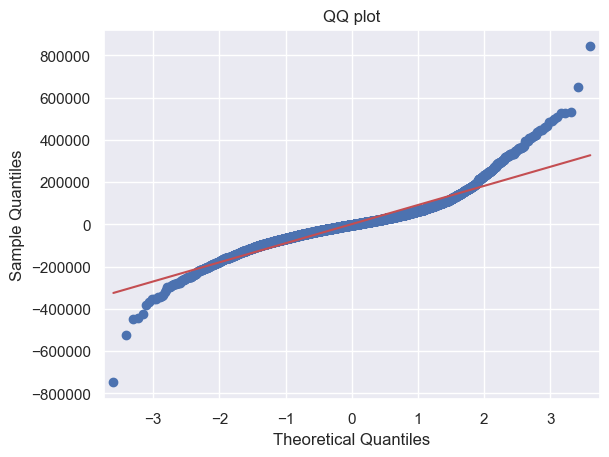

In [16]:
import statsmodels.api as sm
residuals = y_test - pred
sm.qqplot(residuals, line='s')
plt.title("QQ plot")
plt.show()

##### 3.9 Residual Plot

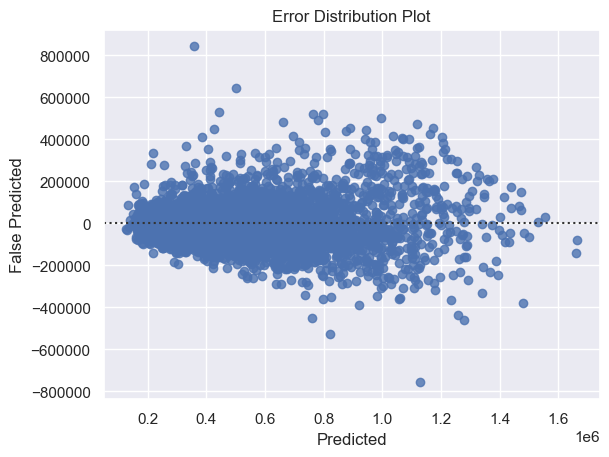

In [17]:
sns.residplot(x=pred, y=y_test, line_kws={"color" : "red"})
plt.xlabel("Predicted")
plt.ylabel("False Predicted")
plt.title("Error Distribution Plot")
plt.show()


#### 4.0 Exporting our model

In [18]:
import pickle
pickle.dump(xgb, open('../../models/model.pkl', 'wb'))

#### 5.0 Exporting Final Processed dataset

##### 5.1 Exporting Training data

In [19]:
import os
directory = '../../data/processed/'
file_name = 'processed_data_X_train.csv'
full_path = os.path.join(directory, file_name)

X_train.to_csv(full_path, index=False)


directory = '../../data/processed/'
file_name = 'processed_data_X_test.csv'
full_path = os.path.join(directory, file_name)

X_test.to_csv(full_path, index=False)

##### 5.2 Exporting Test data

In [20]:
directory = '../../data/processed/'
file_name = 'processed_data_y_train.csv'
full_path = os.path.join(directory, file_name)

y_train.to_csv(full_path, index=False)


directory = '../../data/processed/'
file_name = 'processed_data_y_test.csv'
full_path = os.path.join(directory, file_name)

y_test.to_csv(full_path, index=False)